In [ ]:
# importing the general dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings
from PIL import Image
from scipy import misc

In [ ]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d fatihkgg/affectnet-yolo-format
!unzip affectnet-yolo-format.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yaml
# Define your data
data = {
    'data': 'YOLO_format',
    'train': 'YOLO_format/train/images',
    'val': 'YOLO_format/valid/images',
    'test': 'YOLO_format/test/images',
    'nc': 8,
    'names': [
        "Anger",
        "Contempt",
        "Disgust",
        "Fear",
        "Happy",
        "Neutral",
        "Sad",
        "Surprise",
    ],
    'network': 'yolov8n'
}

# Specify the file path
file_path = '/content/yolo_config.yaml'

# Write the data to a YAML file
with open(file_path, 'w') as file:
    yaml.dump(data, file)

In [ ]:
# Lets check what we have in our dataset
dataset_root = 'YOLO_format/'
for root, directories, files in os.walk(dataset_root):
    # Do something with the current directory path 'root'
    print("Current directory:", root)
    # Do something with the list of subdirectories 'directories'
    print("Subdirectories:", directories)
    # Do something with the list of files 'files'
    print("Files:", len(files))

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [ ]:
model = YOLO('yolov8n.pt')
os.environ["WANDB_MODE"] = "disabled"

100%|██████████| 6.23M/6.23M [00:00<00:00, 128MB/s]


In [ ]:
yaml_path = '/content/yolo_config.yaml'
model.train(
    data=yaml_path,
    epochs=5,
    batch=8,
    name='original_model',
    imgsz=640)

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo_config.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=original_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 25.0MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/YOLO_format/train/labels... 17101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17101/17101 [00:10<00:00, 1644.23it/s]


train: New cache created: /content/YOLO_format/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/YOLO_format/valid/labels... 5406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5406/5406 [00:04<00:00, 1237.09it/s]


val: New cache created: /content/YOLO_format/valid/labels.cache
Plotting labels to runs/detect/original_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/original_model
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.42G     0.1431      1.983     0.9423         15        640: 100%|██████████| 2138/2138 [06:43<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  6.95it/s]


                   all       5406       5406      0.307      0.657      0.415      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.25G       0.09      1.502     0.9008         20        640: 100%|██████████| 2138/2138 [06:35<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  7.03it/s]

                   all       5406       5406      0.382      0.656       0.49       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.24G    0.07437      1.401     0.8955         19        640: 100%|██████████| 2138/2138 [06:20<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.17it/s]

                   all       5406       5406      0.581      0.568      0.553      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.24G    0.06219      1.335     0.8937         13        640: 100%|██████████| 2138/2138 [06:20<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  6.90it/s]

                   all       5406       5406      0.457      0.694      0.589      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.24G     0.0488      1.278     0.8903         17        640: 100%|██████████| 2138/2138 [06:24<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  7.01it/s]

                   all       5406       5406      0.545      0.686      0.643      0.643



5 epochs completed in 0.609 hours.
Optimizer stripped from runs/detect/original_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/original_model/weights/best.pt, 6.2MB

Validating runs/detect/original_model/weights/best.pt...
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:49<00:00,  6.82it/s]


                   all       5406       5406      0.544      0.688      0.643      0.643
                 Anger       5406        712      0.521      0.637      0.606      0.606
              Contempt       5406        618      0.615      0.733      0.722      0.722
               Disgust       5406        672      0.421      0.772      0.599      0.599
                  Fear       5406        622      0.521      0.699      0.653      0.653
                 Happy       5406        791      0.807      0.857       0.92       0.92
               Neutral       5406        514      0.522      0.564      0.552      0.552
                   Sad       5406        603      0.418       0.42       0.41       0.41
              Surprise       5406        874      0.525      0.822       0.68       0.68
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/original_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78697578eb30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [ ]:
os.listdir('runs/detect/original_model')

['results.png',
 'F1_curve.png',
 'train_batch0.jpg',
 'args.yaml',
 'val_batch1_pred.jpg',
 'results.csv',
 'labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch0_labels.jpg',
 'confusion_matrix.png',
 'val_batch2_pred.jpg',
 'events.out.tfevents.1714539437.054d7df8893e.1742.0',
 'confusion_matrix_normalized.png',
 'PR_curve.png',
 'train_batch1.jpg',
 'val_batch1_labels.jpg',
 'weights',
 'R_curve.png',
 'labels_correlogram.jpg',
 'P_curve.png',
 'val_batch2_labels.jpg',
 'train_batch2.jpg']

In [ ]:
os.listdir('runs/detect/original_model/weights')

['best.pt', 'last.pt']

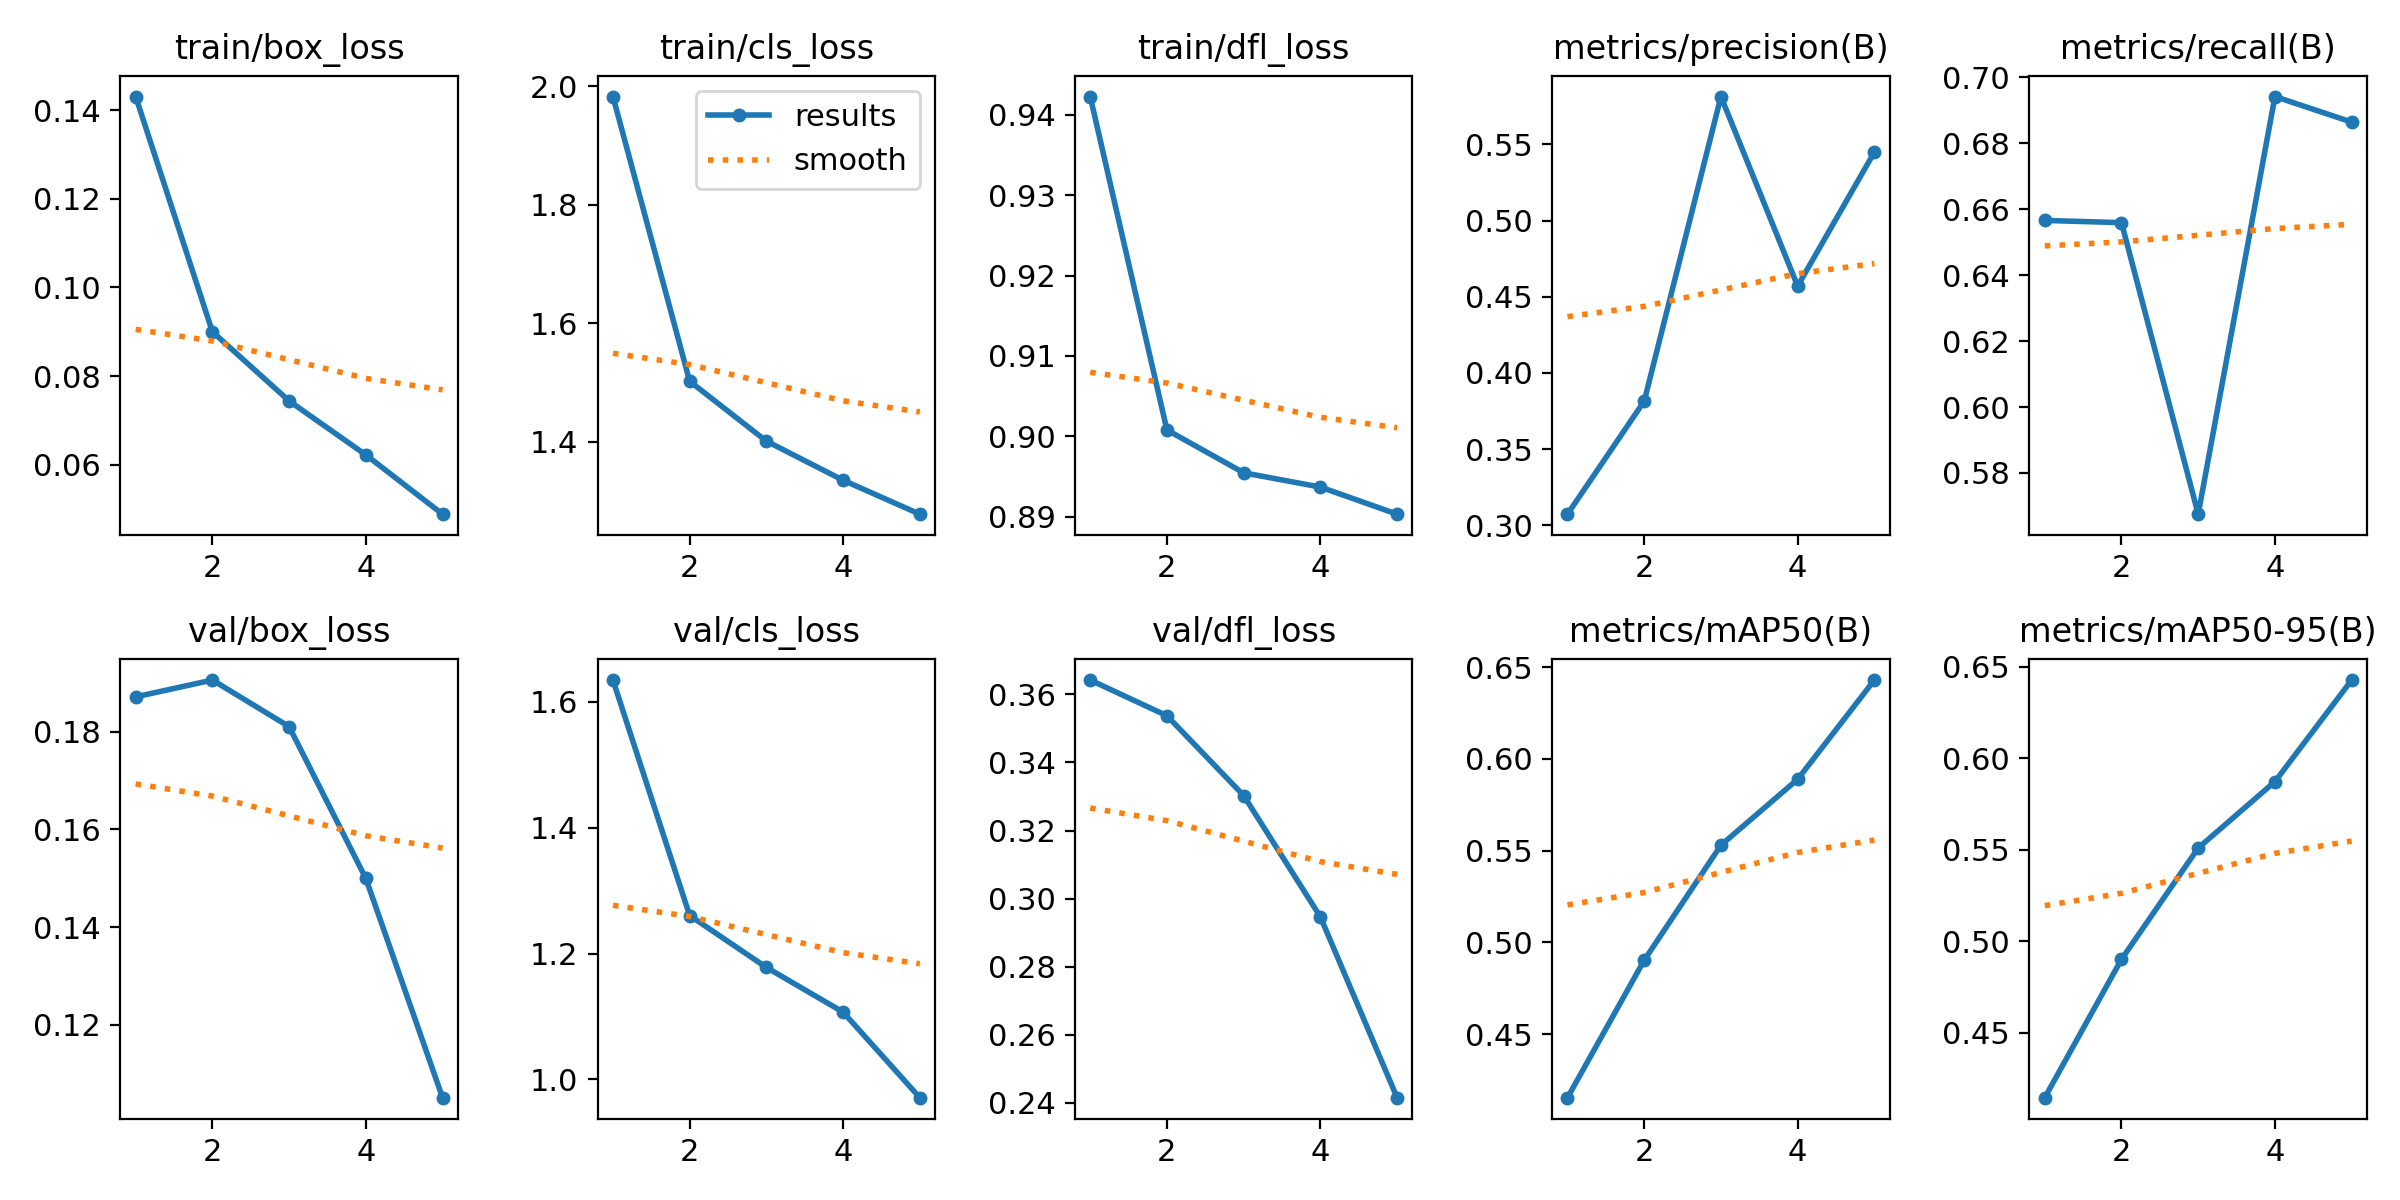

In [ ]:
Image(filename=f"runs/detect/original_model/results.png", width=1000)

In [ ]:
from google.colab import files
files.download('runs/detect/original_model/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_model = YOLO('runs/detect/original_model/weights/best.pt')
test_model.predict(source='/content/YOLO_format/test/images')